<a href="https://colab.research.google.com/github/donib-irakihda/fusemachines-ai-fellowship/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

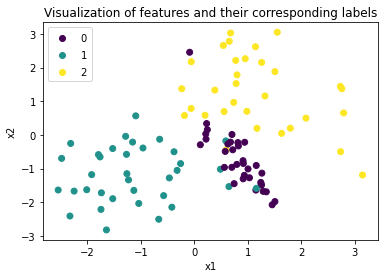

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=3, random_state=10, flip_y=0.02,
                           class_sep=1, n_clusters_per_class=1)

scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(*scatter.legend_elements(), loc=2)
plt.title("Visualization of features and their corresponding labels")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Train decision tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

clff = DecisionTreeClassifier(random_state=12)
clff.fit(X_train, y_train)
print(clff)

print('Training')
print("Accuracy: ", accuracy_score(y_train, clff.predict(X_train)))

print("Test")
print("Accuracy: ", accuracy_score(y_test, clff.predict(X_test)))

DecisionTreeClassifier(random_state=12)
Training
Accuracy:  1.0
Test
Accuracy:  0.75


In [6]:
import warnings
warnings.filterwarnings("ignore")
from six import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus

def plot_tree(tree_clf, impurity = False):
  dot_data = StringIO()
  label = ['class 0', 'class 1', 'class 2']
  export_graphviz(tree_clf, feature_names=['x1', 'x2'], impurity=impurity, out_file=dot_data, filled=True, rounded=True, node_ids=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  display(Image(graph.create_png()))

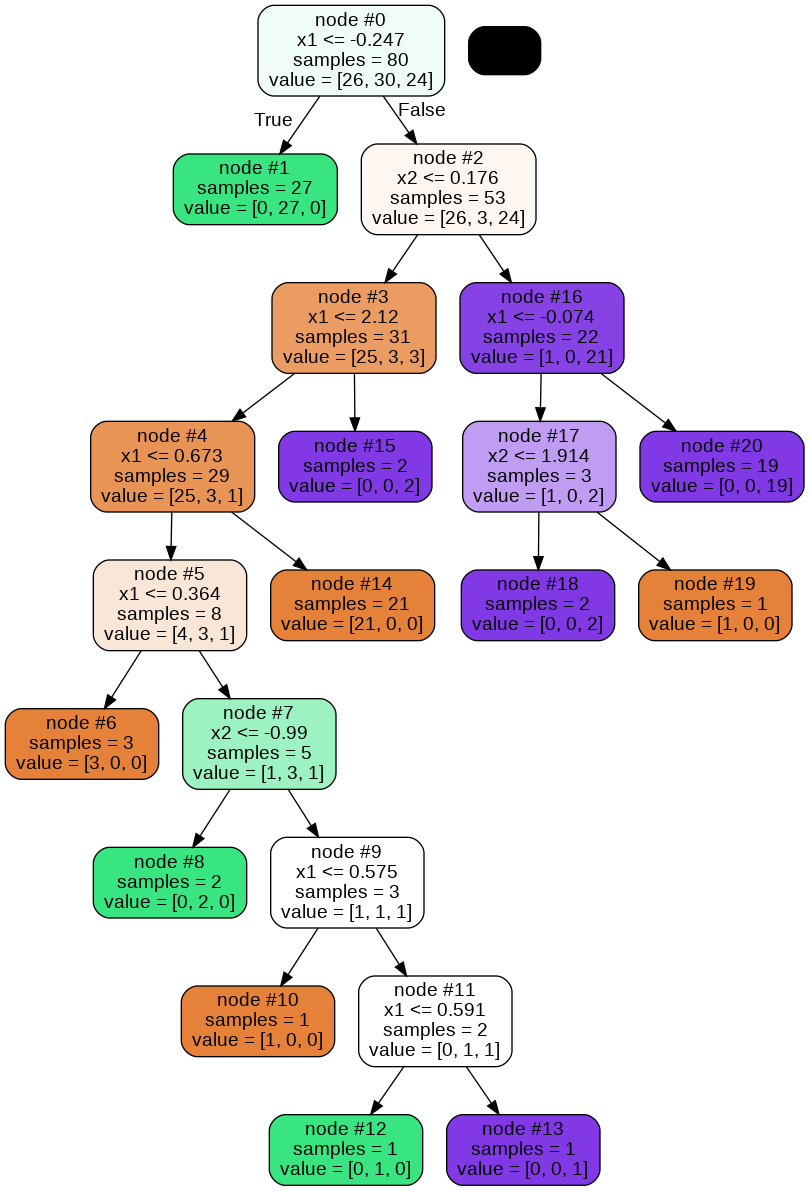

In [7]:
plot_tree(clff)

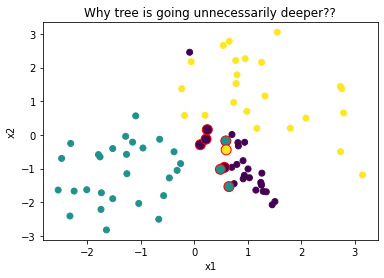

In [11]:
noise_index = (X_train[:,0]>-0.247)&(X_train[:,1]<=0.176)&(X_train[:,0]<=2.12)&(X_train[:,0]<=0.673)
noise = X_train[noise_index]
noise_label = y_train[noise_index]

scatter = plt.scatter(X_train[:,0], X_train[:,1], c= y_train)
scatter = plt.scatter(noise[:,0], noise[:,1], c= noise_label, s=100, edgecolors="red")
plt.title("Why tree is going unnecessarily deeper??")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Depth Limititaion

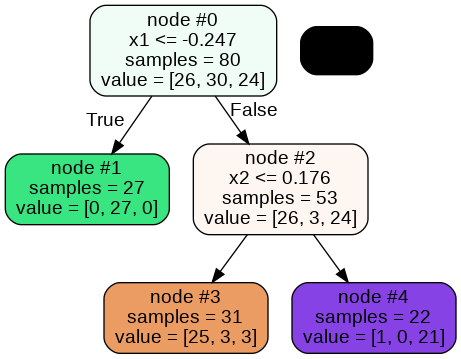

Training Accuracy:  0.9125
Test Accuracy:  0.85


In [12]:
from sklearn.metrics import accuracy_score
clf1 = DecisionTreeClassifier(max_depth=2, random_state=12)
clf1.fit(X_train, y_train)

plot_tree(clf1)

print("Training Accuracy: ", accuracy_score(y_train, clf1.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, clf1.predict(X_test)))

## Impurity Threshold

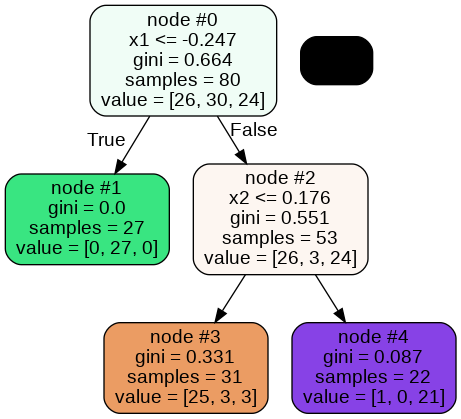

Training Accuracy:  0.9125
Testing Accuracy:  0.85


In [13]:
clf2 = DecisionTreeClassifier(min_impurity_decrease=0.2, random_state=12)
clf2.fit(X_train, y_train)

plot_tree(clf2, impurity=True)

print("Training Accuracy: ", accuracy_score(y_train, clf2.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, clf2.predict(X_test)))


## Minimum number 0f Samples

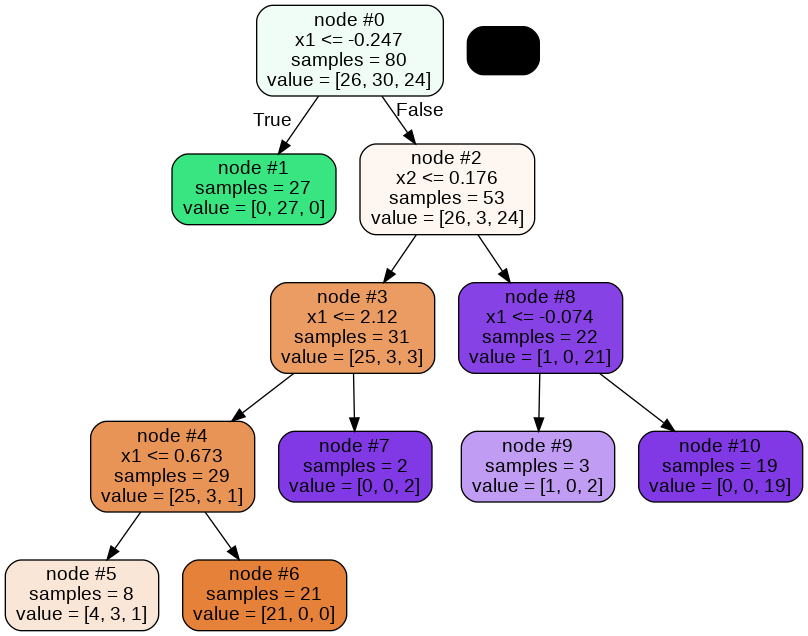

Training Accuracy:  0.9375
Testing Accuracy:  0.85


In [14]:
clf3 = DecisionTreeClassifier(min_samples_split=15, random_state=12)
clf3.fit(X_train, y_train)

plot_tree(clf3)

print("Training Accuracy: ", accuracy_score(y_train, clf3.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, clf3.predict(X_test)))

## Pruning

In [15]:
clf = DecisionTreeClassifier(random_state=12)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.01166667 0.01193182 0.024375   0.0294181  0.0394327
 0.2130049  0.29865566]


Tree with ccp_aplha= 0.0


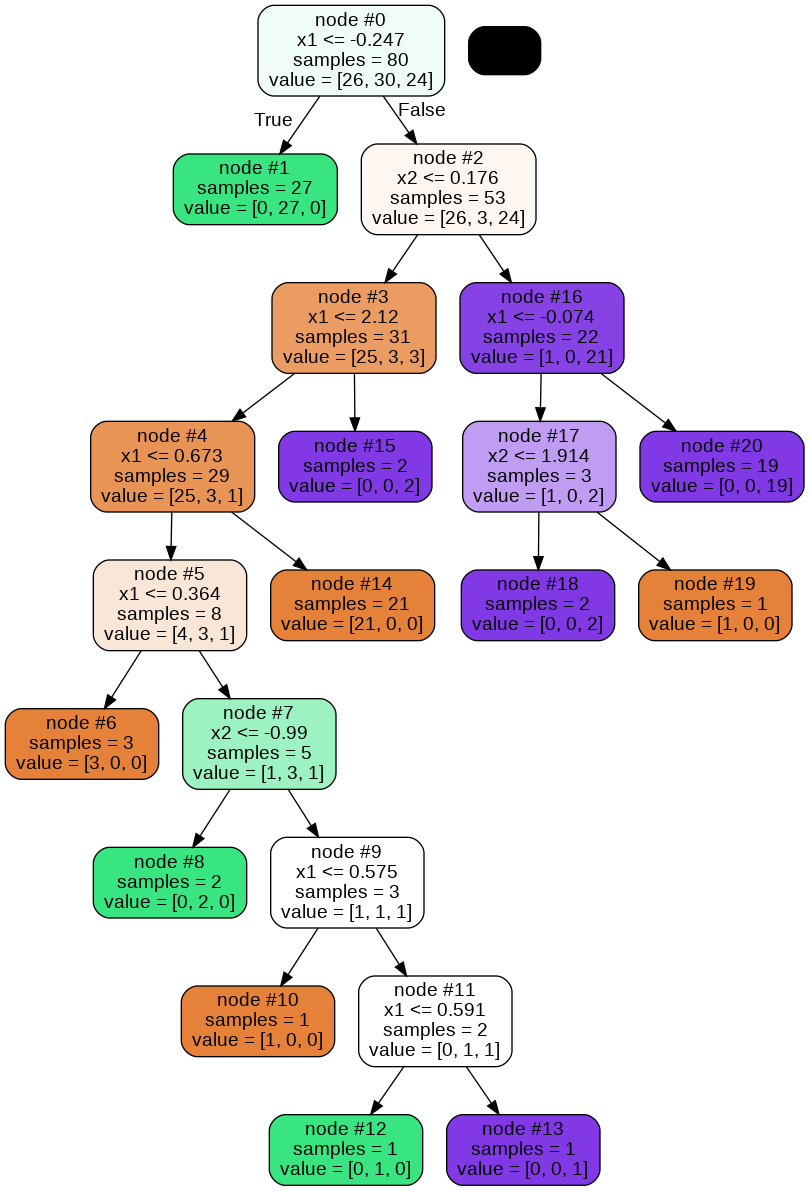

Tree with ccp_aplha= 0.011666666666666667


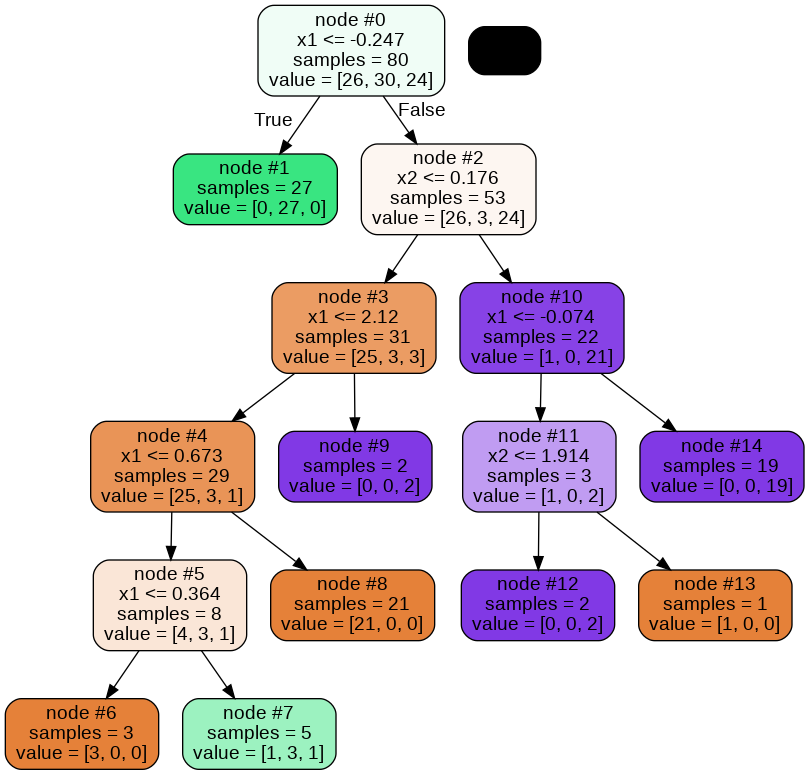

Tree with ccp_aplha= 0.011931818181818188


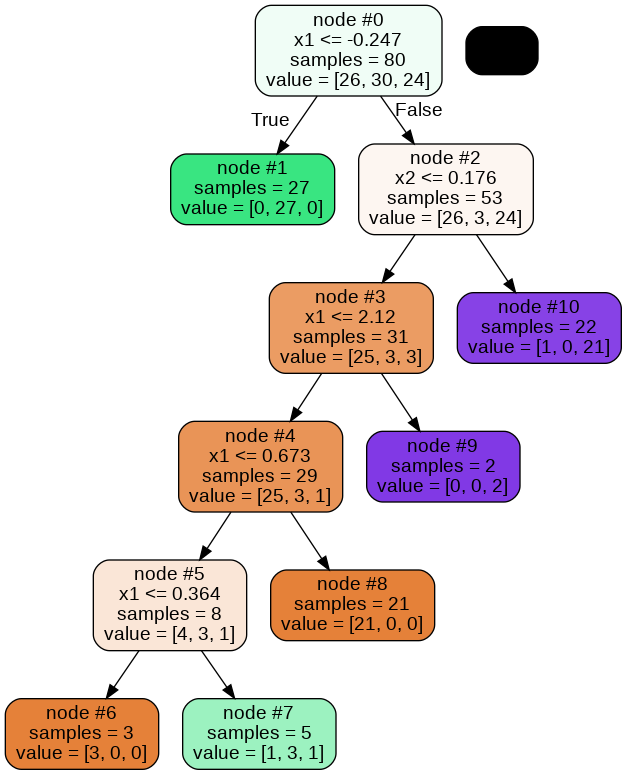

Tree with ccp_aplha= 0.024374999999999994


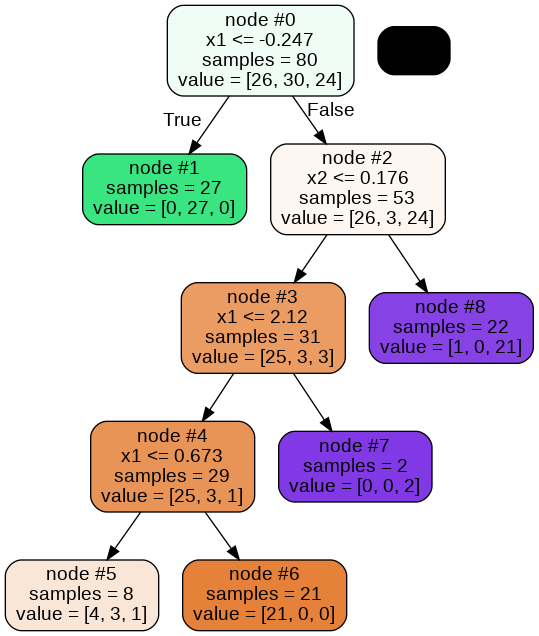

Tree with ccp_aplha= 0.029418103448275876


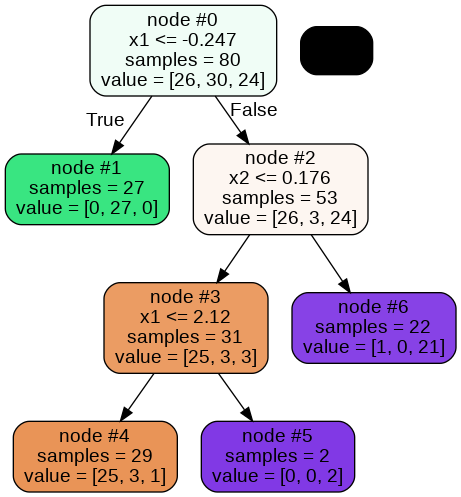

Tree with ccp_aplha= 0.03943270300333704


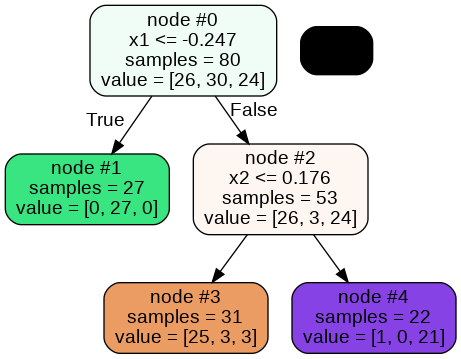

Tree with ccp_aplha= 0.2130048968073922


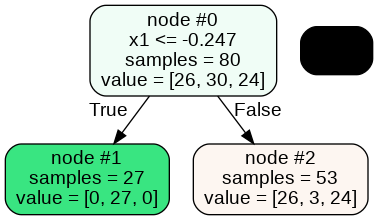

Tree with ccp_aplha= 0.2986556603773586


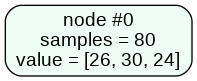

In [19]:
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(ccp_alpha = ccp_alpha, random_state=12)
  clf.fit(X_train, y_train)
  print("Tree with ccp_aplha= {}".format(ccp_alpha))
  plot_tree(clf)

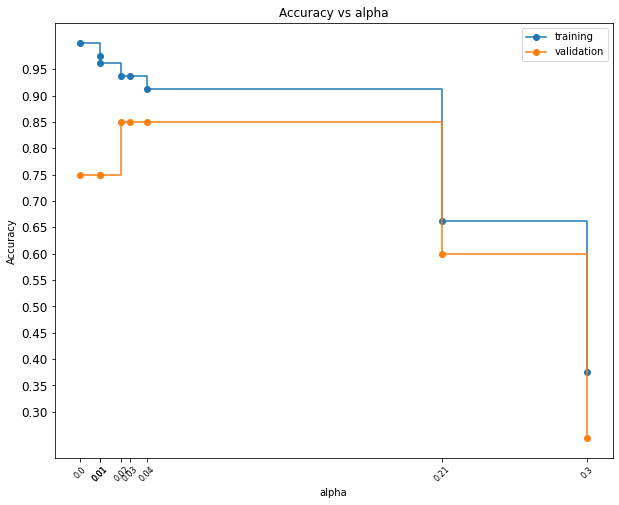

In [20]:
import numpy as np
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=12, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize = (10,8))
plt.plot(ccp_alphas, train_scores,marker='o', label="training",
        drawstyle="steps-post")
plt.plot(ccp_alphas, valid_scores, marker='o', label="validation",
        drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs alpha")
plt.legend()
rounded_ccp = [ round(elem, 2) for elem in ccp_alphas ]
locs, labels = plt.xticks()
plt.xticks(ccp_alphas, rounded_ccp, rotation = 45, fontsize = 8)
plt.yticks(np.arange(0.3,1,0.05), fontsize = 12)
plt.show()

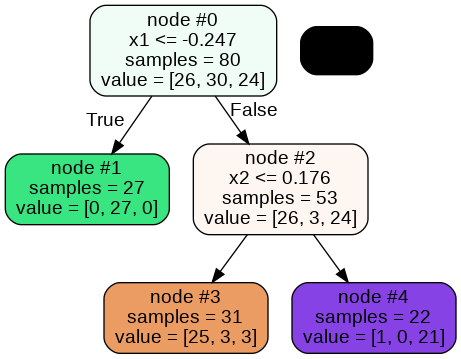

In [21]:
## Optimal Tree
clf = DecisionTreeClassifier(ccp_alpha = 0.04, random_state=12)
clf.fit(X_train, y_train)
plot_tree(clf)